In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [94]:
df=pd.DataFrame(pd.read_csv('diabetes.csv'))

In [95]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot: >

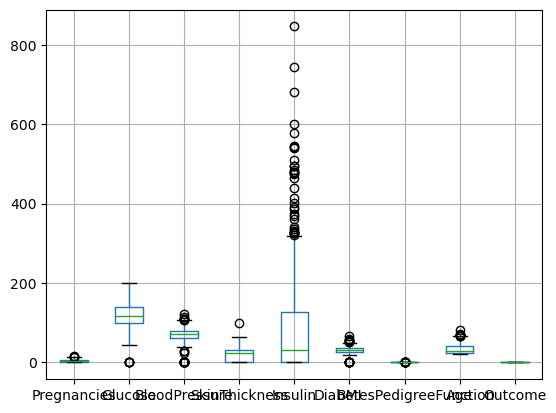

In [97]:
df.boxplot()

In [20]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75) 
iqr = q3 - q1
df = df[(df > (q1 - 1.5*iqr)) & (df < (q3 + 1.5*iqr))]

<AxesSubplot: >

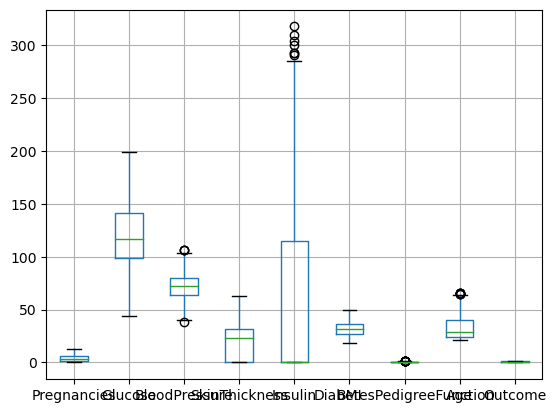

In [21]:
df.boxplot()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
x=df.iloc[:,:-1]
y=df['Outcome']

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [102]:
parameter={'criterion':['gini','entropy','log_loss'],
           'splitter':['best','random'],
           'max_depth':[1,2,3,4,5],
           'max_features':['auto','sqrt','log2']}

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [104]:
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [107]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 1,
 'max_features': 'log2',
 'splitter': 'best'}

In [108]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score,confusion_matrix

In [109]:
y_pred=clf.predict(x_test)

In [110]:
score=accuracy_score(y_pred,y_test)

In [111]:
score

0.6535433070866141

In [112]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       196
           1       0.33      0.48      0.39        58

    accuracy                           0.65       254
   macro avg       0.57      0.59      0.57       254
weighted avg       0.71      0.65      0.67       254



In [113]:
f1_score(y_pred,y_test)

0.38888888888888895

In [114]:
precision_score(y_pred,y_test)

0.32558139534883723

In [115]:
recall_score(y_pred,y_test)

0.4827586206896552

In [116]:
confusion_matrix(y_pred,y_test)

array([[138,  58],
       [ 30,  28]])

In [117]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr,tpr, thresholds=roc_curve(y_pred,y_test)

In [118]:
roc_auc=auc(fpr,tpr)

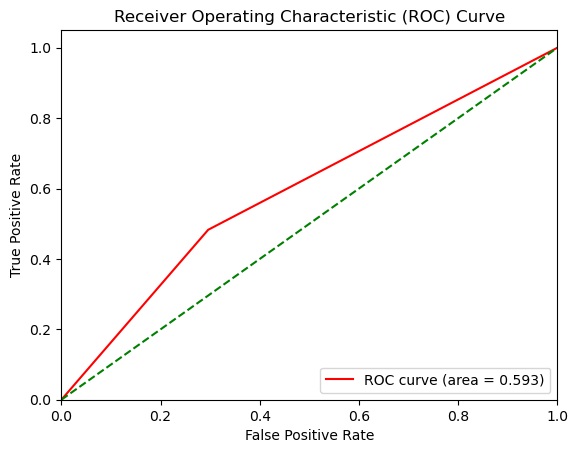

In [119]:
plt.plot(fpr, tpr, color='red',label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [120]:
treeclass=DecisionTreeClassifier(criterion='gini',max_depth=2,max_features='log2',splitter='best')
treeclass.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features='log2')

[Text(0.5, 0.8333333333333334, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.5, 'x[0] <= 4.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.318\nsamples = 287\nvalue = [230, 57]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.467\nsamples = 145\nvalue = [91, 54]'),
 Text(0.75, 0.5, 'x[5] <= 28.7\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.157\nsamples = 70\nvalue = [6, 64]')]

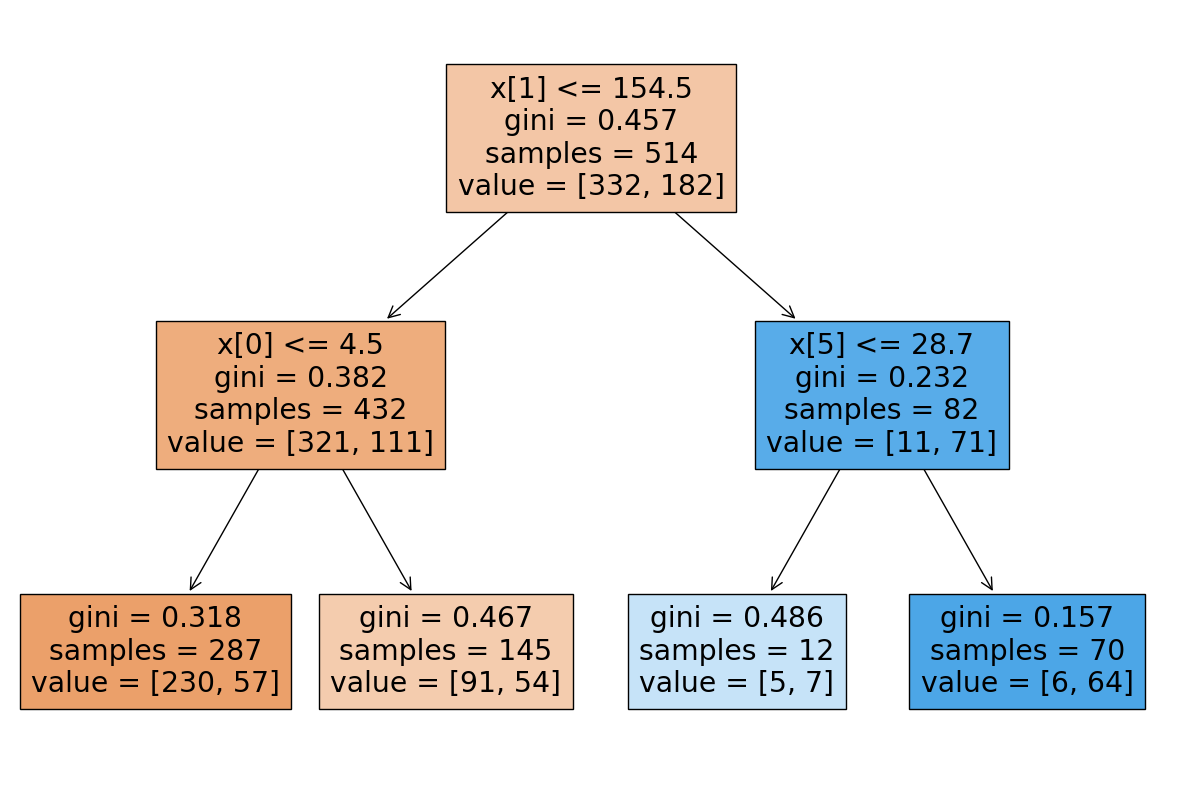

In [121]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclass,filled=True)

In [123]:
df_new=pd.read_csv('new_diabetes.csv')

In [124]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,105,72,29,140,34.2,0.123,31,0
1,5,75,66,0,0,32.3,0.586,40,0
2,8,167,100,18,152,32.4,0.964,45,1
3,2,132,80,30,0,29.1,0.268,26,0
4,4,101,62,21,0,25.9,0.185,37,0
5,9,145,84,20,210,31.7,0.835,49,1
6,12,130,80,0,0,34.4,0.362,47,1
7,7,170,100,41,369,45.3,0.735,38,1
8,6,88,60,0,0,26.4,0.198,42,0
9,2,120,72,15,0,25.7,0.127,29,0


In [125]:
xnew=df_new.iloc[:,:-1]
ynew=df_new['Outcome']

In [126]:
ynew_pred=treeclass.predict(xnew)

In [127]:
accuracy_score(ynew_pred,ynew)

0.8